1. NLP focuses on analyzing meaning of text and speech. 

2. Starts with recognition- what words are given in text/speech?

3. Sentiment of those words. Whether positive or negative?

4. Generating new text.

etc

Applications:
1. Sentiment Analysis
2. Voice Assistant
3. Translations
4. Smart Speakers
5. Smart Home Devices ...

In [1]:
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt
import os, numpy as np
import pandas as pd
import string

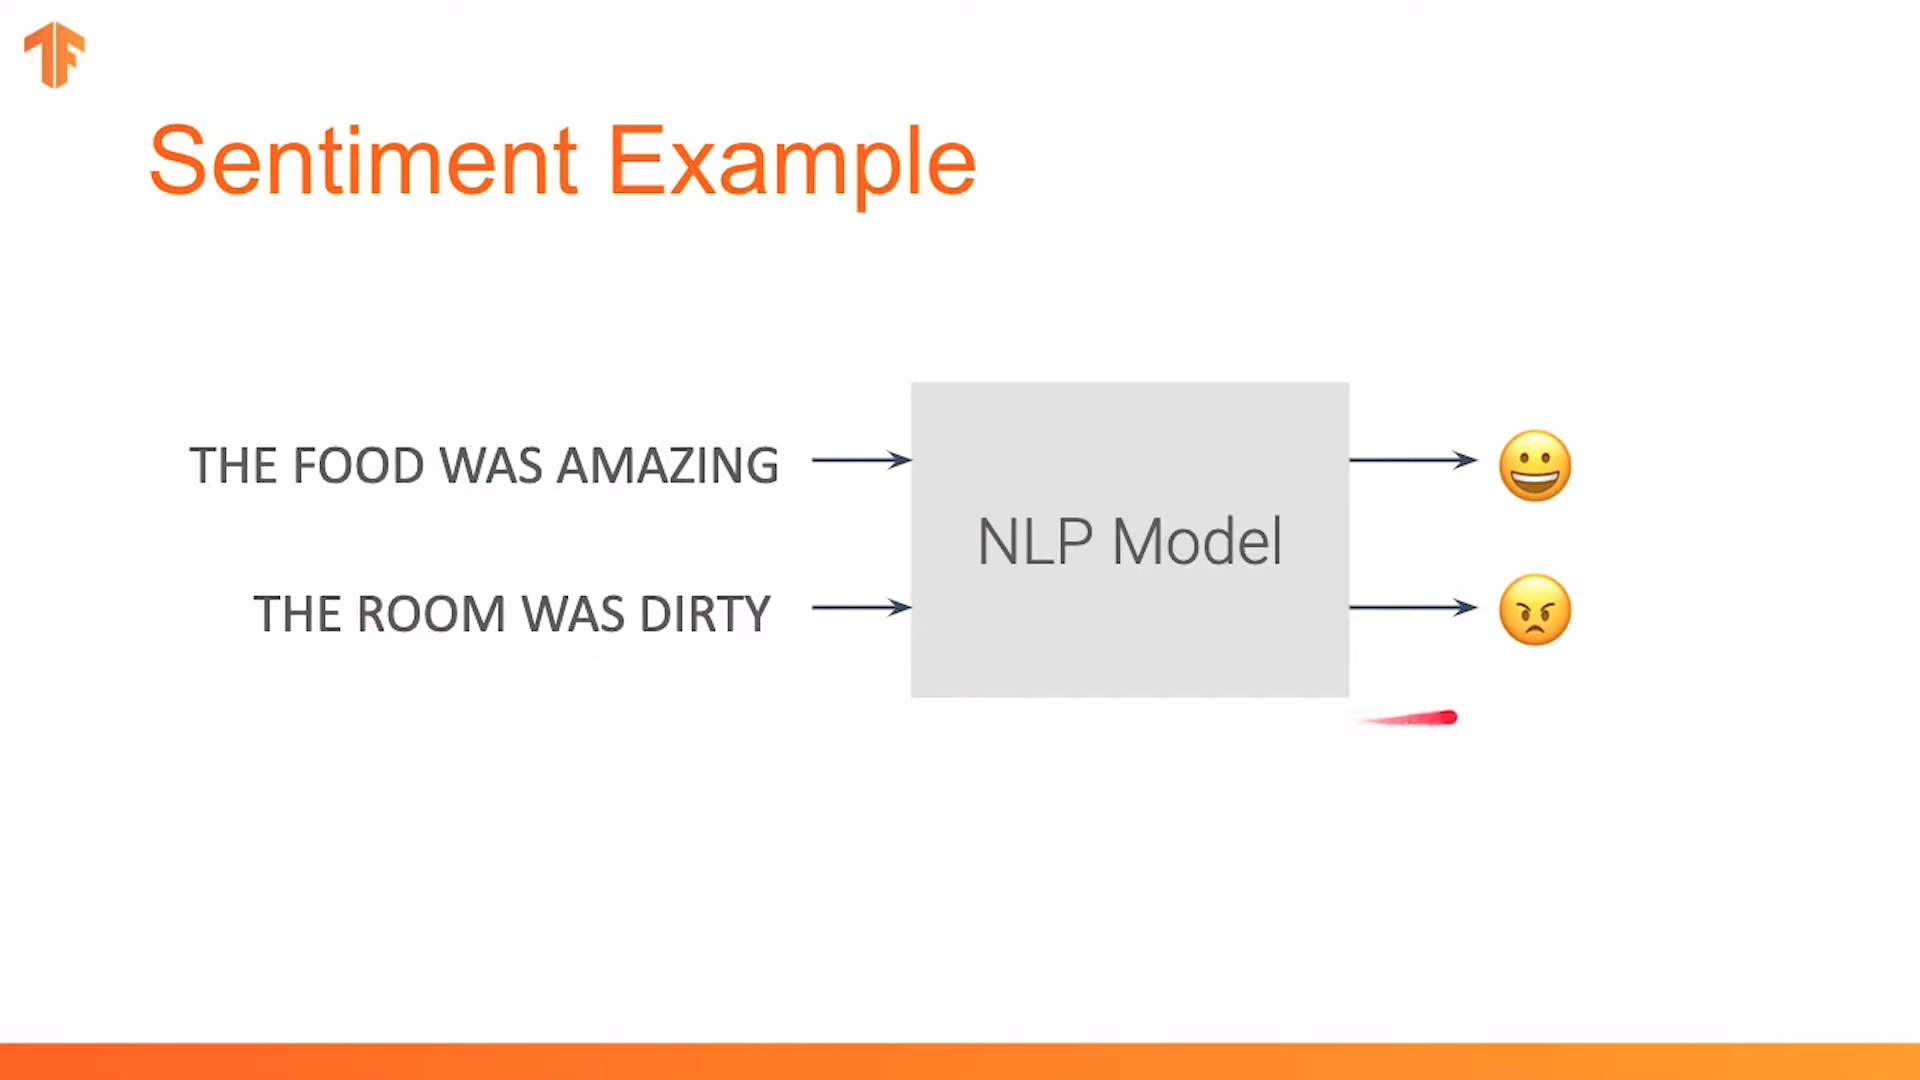

In [2]:
Image(filename='sentiment.png')

Neural networks utilize numbers as their inputs, so we need to convert our input text into numbers.

We need to convert out text values into numbers. This needs to be done smartly as these numbers will be processed
within neural network. Suppose if u give one number to each letter. But some words are anagrams of each other like 
'Stressed' and 'Dessert', so their embedding will also contains the same digits so neural network might learn them
as similar ones.

Here we want to learn the meaning i.e. sentiment of the underlying words not the letters to be exact. So we can convert each word into numerical tokens!

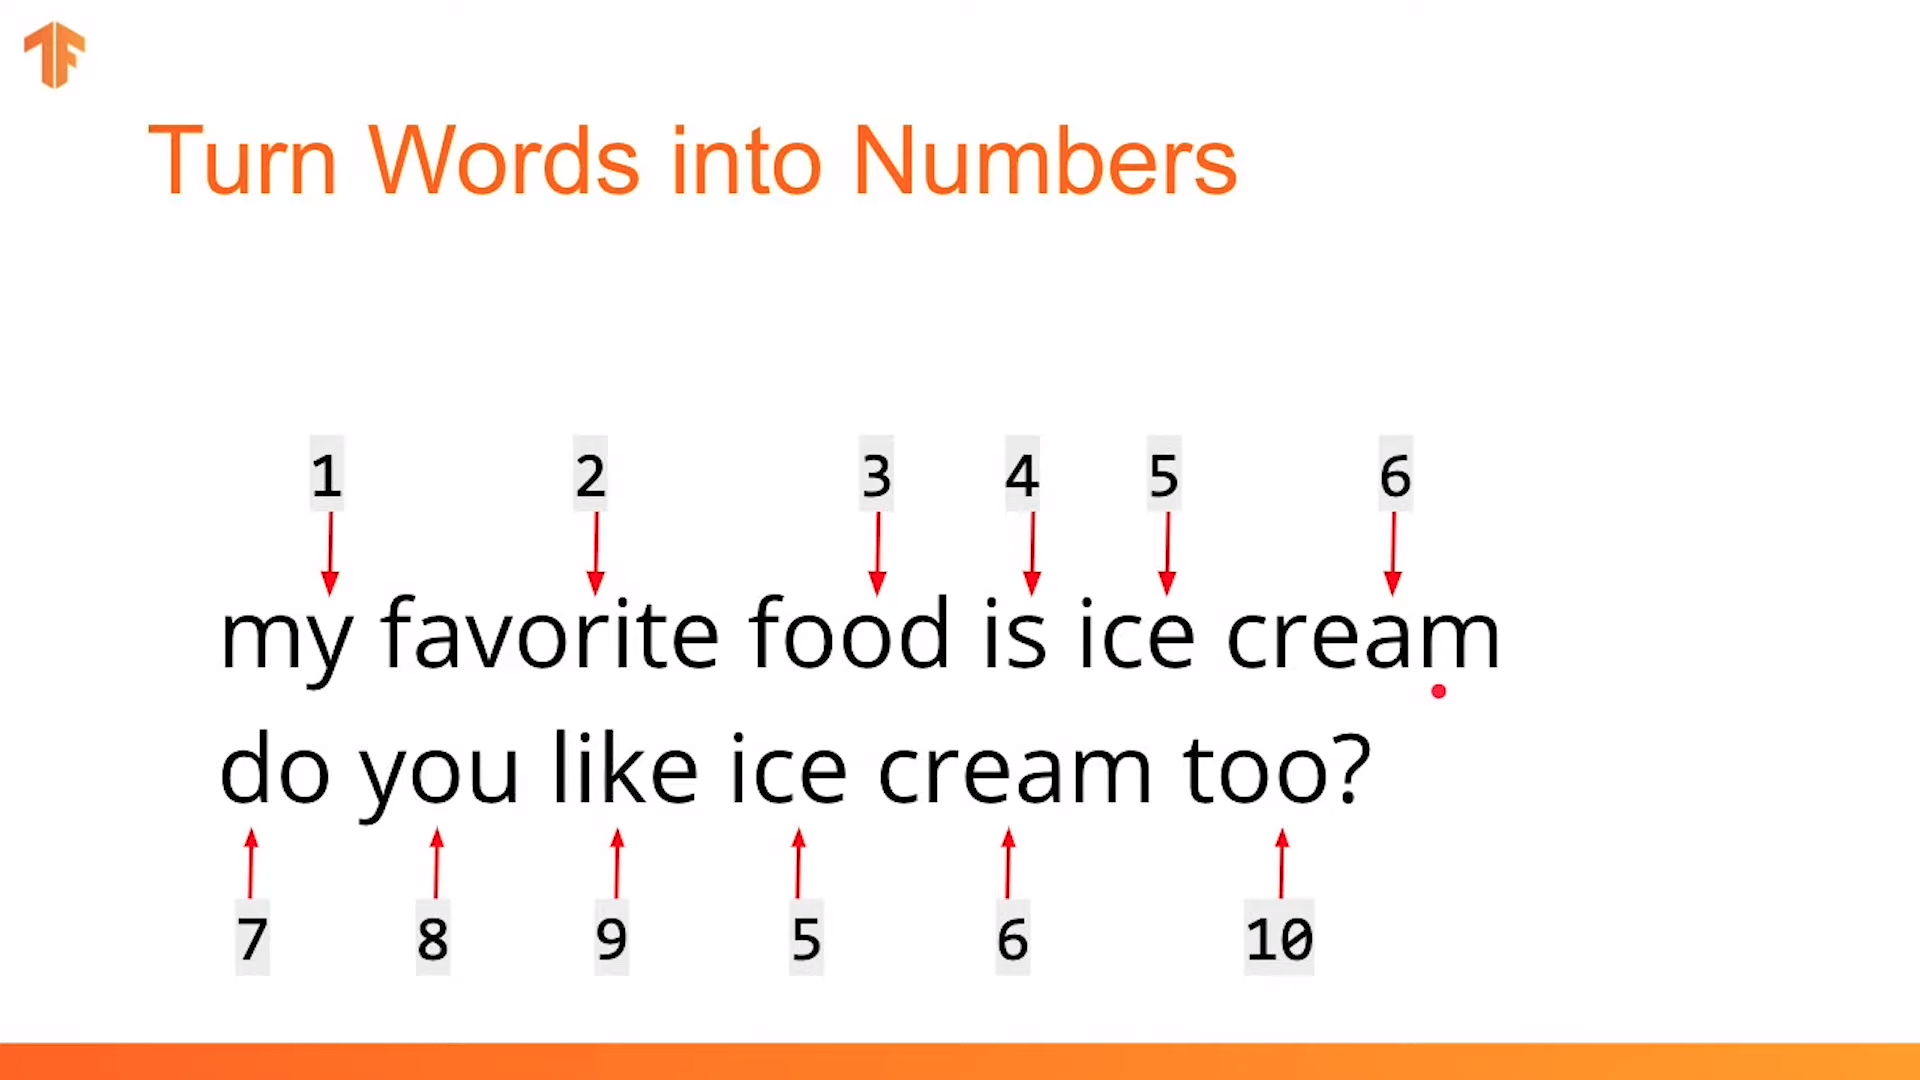

In [3]:
Image(filename='word tokens.png')

This is called Tokenization, i.e. getting a numerical token for each word

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'My Name is Gopal Bhattrai',
    'Hey Man! What you doing out there?',
    'I didnt see that one coming!'
]
tokenizer = Tokenizer(num_words = 10)
# num_words, maximum number of words it will be tokenized and put in the word index. This effectively sets the 
# vocabulary size, which is 10 in this case.

In [5]:
tokenizer.fit_on_texts(sentences)

In [6]:
tokenizer.word_counts

OrderedDict([('my', 1),
             ('name', 1),
             ('is', 1),
             ('gopal', 1),
             ('bhattrai', 1),
             ('hey', 1),
             ('man', 1),
             ('what', 1),
             ('you', 1),
             ('doing', 1),
             ('out', 1),
             ('there', 1),
             ('i', 1),
             ('didnt', 1),
             ('see', 1),
             ('that', 1),
             ('one', 1),
             ('coming', 1)])

In [7]:
tokenizer.word_index

{'my': 1,
 'name': 2,
 'is': 3,
 'gopal': 4,
 'bhattrai': 5,
 'hey': 6,
 'man': 7,
 'what': 8,
 'you': 9,
 'doing': 10,
 'out': 11,
 'there': 12,
 'i': 13,
 'didnt': 14,
 'see': 15,
 'that': 16,
 'one': 17,
 'coming': 18}

To turn sentences into sequences, We use

In [8]:
tokenizer.texts_to_sequences(sentences)

[[1, 2, 3, 4, 5], [6, 7, 8, 9], []]

What if the text sequence being processed is not in the word index(i.e. Vocabulary)? We can provide the out of vocabulary token 
for such words as:

In [9]:
tokenizer = Tokenizer(num_words=10, oov_token='<OOV>')  # U can specify any token as the oov token

In [10]:
tokenizer.fit_on_texts(sentences)

In [11]:
tokenizer.texts_to_sequences(sentences)

[[2, 3, 4, 5, 6], [7, 8, 9, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]

In [12]:
sentences

['My Name is Gopal Bhattrai',
 'Hey Man! What you doing out there?',
 'I didnt see that one coming!']

In [13]:
tokenizer.word_index

{'<OOV>': 1,
 'my': 2,
 'name': 3,
 'is': 4,
 'gopal': 5,
 'bhattrai': 6,
 'hey': 7,
 'man': 8,
 'what': 9,
 'you': 10,
 'doing': 11,
 'out': 12,
 'there': 13,
 'i': 14,
 'didnt': 15,
 'see': 16,
 'that': 17,
 'one': 18,
 'coming': 19}

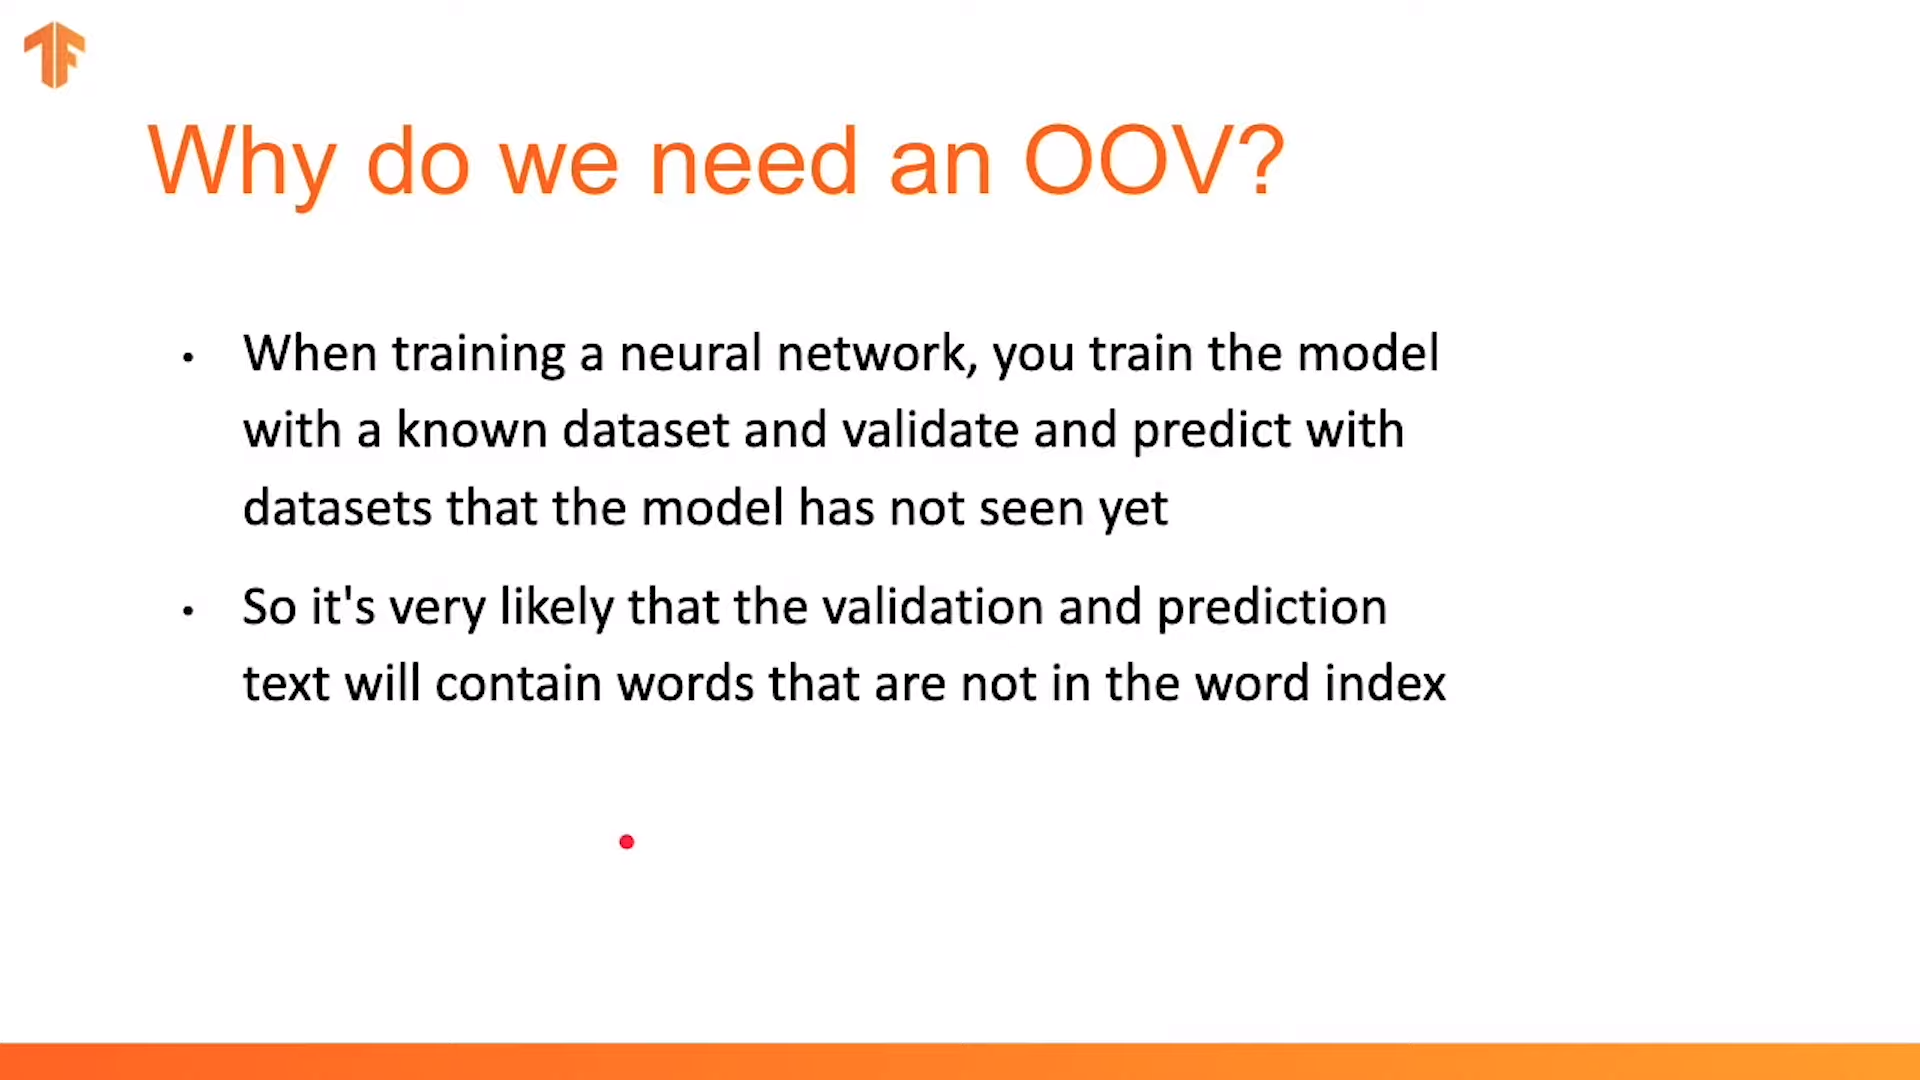

In [14]:
Image(filename='oov.png')

Before passing it to the model we want to ensure that they are of similar size i.e. the sequences are of same size. We can see below as how different sentences can have different sequences.

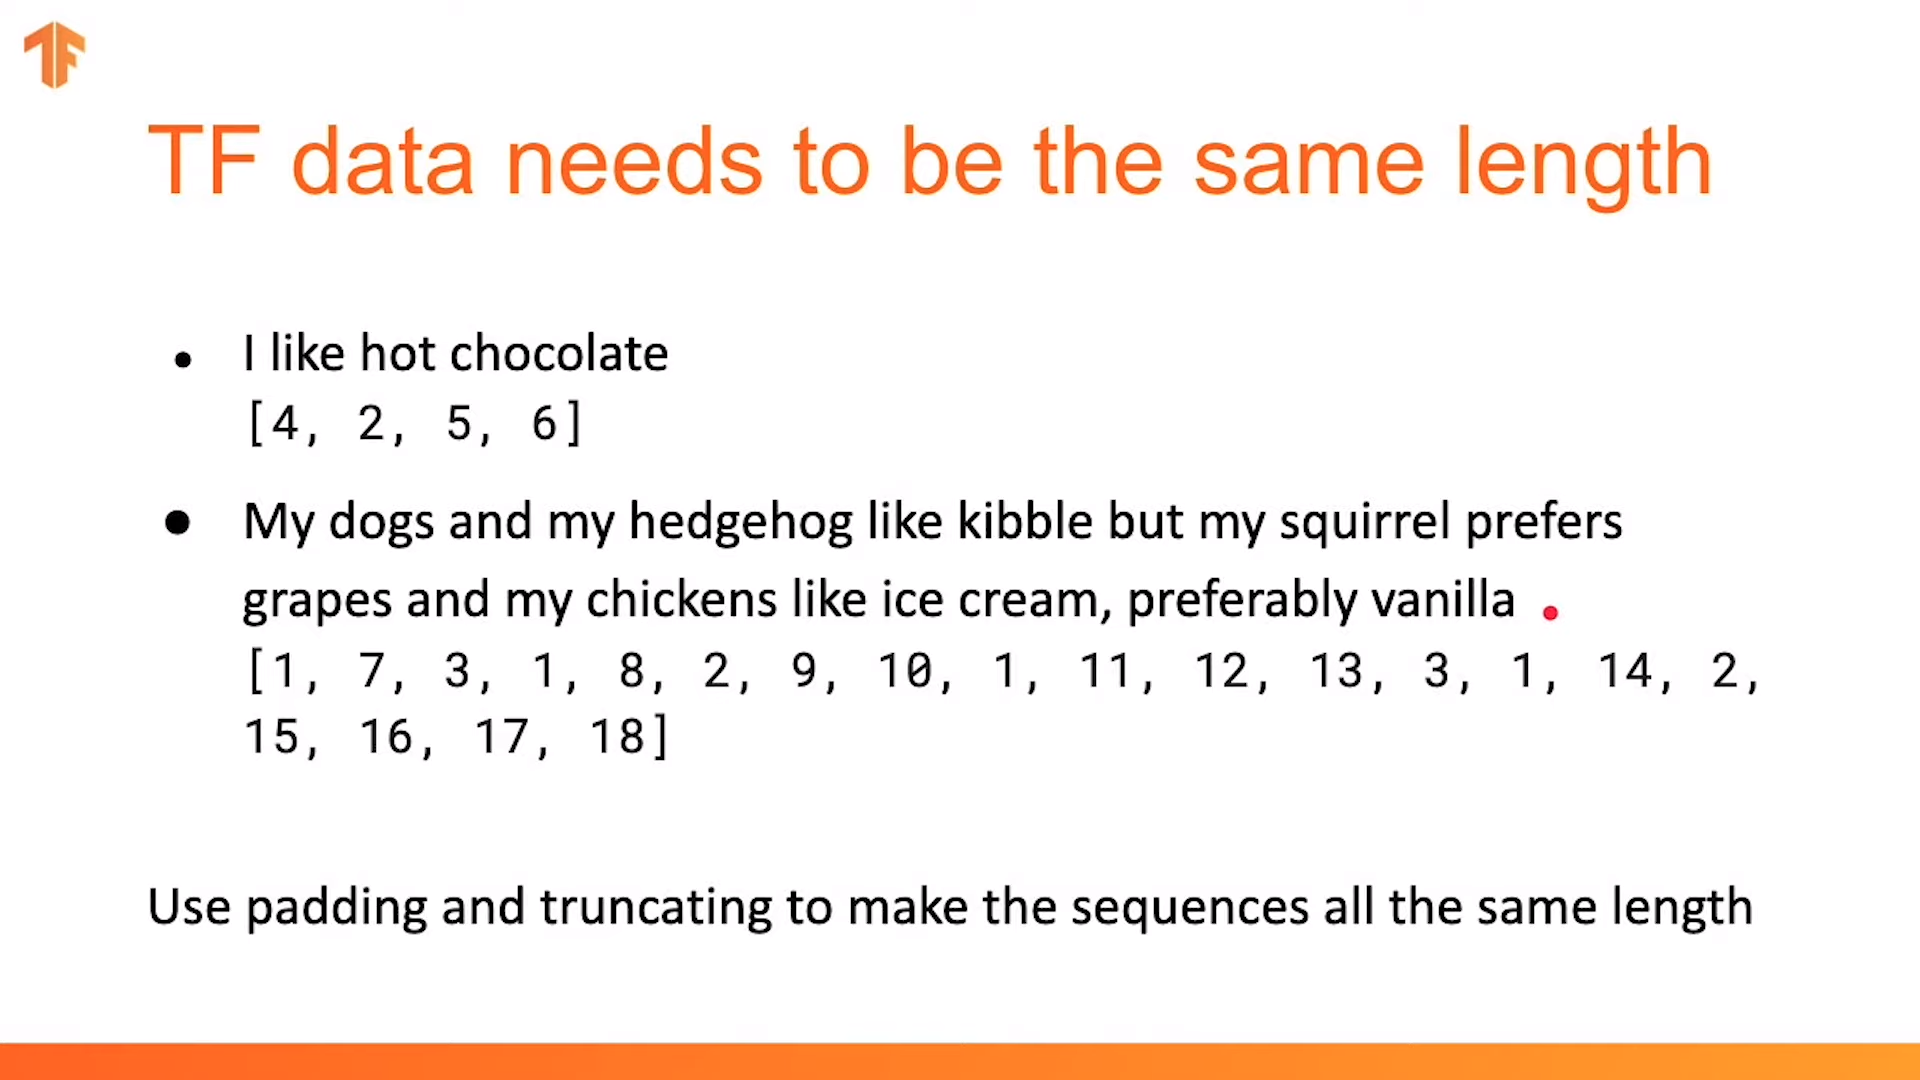

In [15]:
Image(filename='sequences.png')

Pad Sequence: You can pad zeros to the smaller sequences at the end to make them all of same length.

Truncation: You can truncate sequences by cutting the lements off to make them shorter, and you can pad and truncate as needed.

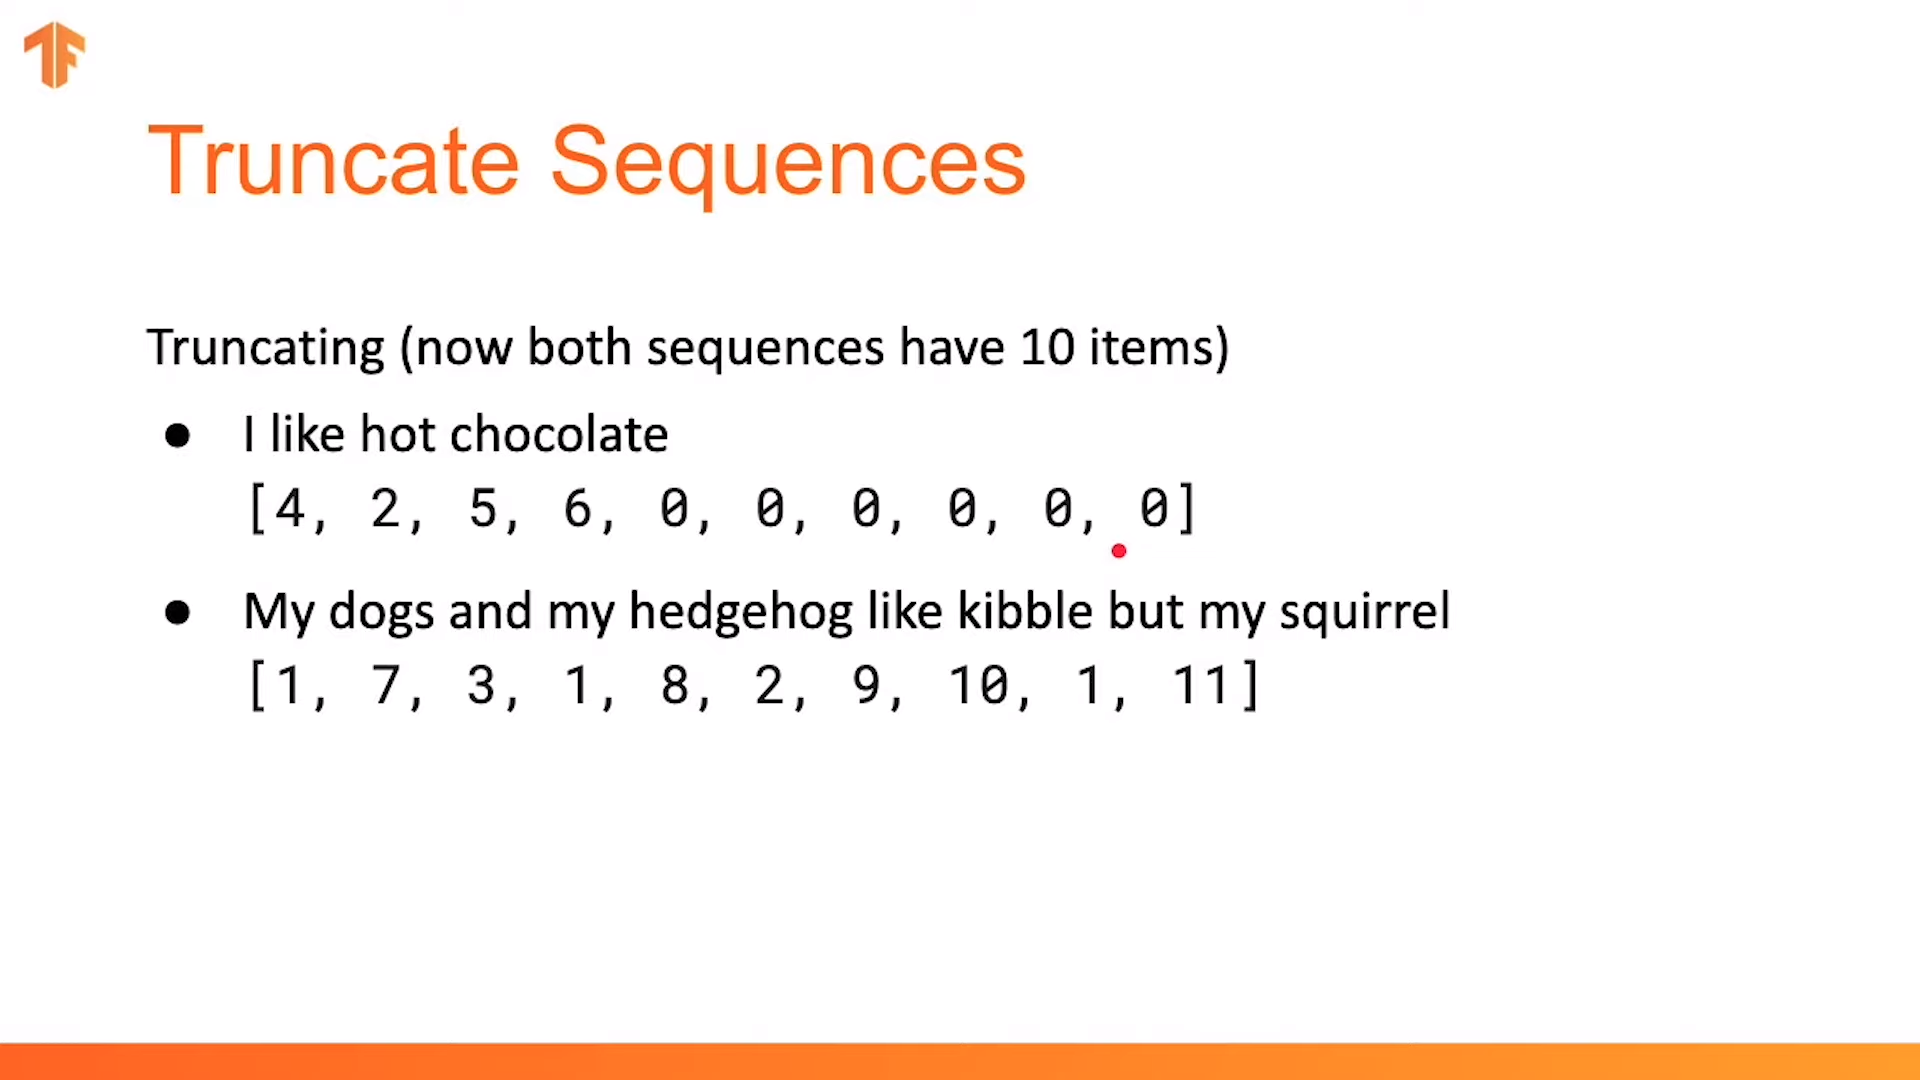

In [16]:
Image(filename='truncate.png')
# Here we truncated the second item and padded the first one

To pad or truncate the sequences we can use:

In [17]:
sentences

['My Name is Gopal Bhattrai',
 'Hey Man! What you doing out there?',
 'I didnt see that one coming!']

In [18]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=5)

# Default, pad_sequences finds the longest sequence and pad all the smaller ones to the longest one. If maxlen is
# longer then the largest sequence everyone will be padded.

In [19]:
padded

# Here it truncated the second element.
# Note truncation or padding happens from the front side, as Default case !!

array([[2, 3, 4, 5, 6],
       [9, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [20]:
tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=3, truncating='post', padding='post')
# post means it will truncate and pad from the end rather than from the beginning.

array([[2, 3, 4],
       [7, 8, 9],
       [1, 1, 1]])

# Lets try to preprocess some real world dataset:

In [21]:
import pandas as pd

path = os.path.join(os.curdir, 'combined_data.csv')
data = pd.read_csv(path)


In [22]:
sentences = list(data['text'])
sentiment = list(data['sentiment'])

In [23]:
# Lets tokenize the dataset.

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=500, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

In [24]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'a': 5,
 'it': 6,
 'to': 7,
 'is': 8,
 'was': 9,
 'this': 10,
 'of': 11,
 'not': 12,
 'for': 13,
 'my': 14,
 'in': 15,
 'with': 16,
 'very': 17,
 'good': 18,
 'great': 19,
 'phone': 20,
 'that': 21,
 'on': 22,
 'have': 23,
 'you': 24,
 'food': 25,
 'had': 26,
 'place': 27,
 'so': 28,
 'but': 29,
 'service': 30,
 'are': 31,
 'be': 32,
 'we': 33,
 'all': 34,
 'as': 35,
 'at': 36,
 'like': 37,
 'they': 38,
 'time': 39,
 'back': 40,
 'one': 41,
 'were': 42,
 'quality': 43,
 'would': 44,
 'really': 45,
 'here': 46,
 'if': 47,
 'from': 48,
 'well': 49,
 'your': 50,
 'just': 51,
 'product': 52,
 'up': 53,
 'best': 54,
 "don't": 55,
 'no': 56,
 'will': 57,
 'an': 58,
 'there': 59,
 'go': 60,
 'me': 61,
 'has': 62,
 'only': 63,
 'also': 64,
 'works': 65,
 "i've": 66,
 'out': 67,
 'headset': 68,
 'nice': 69,
 'ever': 70,
 'battery': 71,
 "it's": 72,
 'sound': 73,
 'than': 74,
 'use': 75,
 'or': 76,
 'when': 77,
 "i'm": 78,
 'our': 79,
 'get': 80,
 'wh

In [25]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')

In [26]:
padded.shape

(1992, 139)

In [27]:
padded[:10]

array([[ 28,  59,   8, ...,   0,   0,   0],
       [ 18, 110,  87, ...,   0,   0,   0],
       [ 19,  13,   2, ...,   0,   0,   0],
       ...,
       [ 47,  24,  31, ...,   0,   0,   0],
       [  1,   7, 137, ...,   0,   0,   0],
       [ 81,   5, 167, ...,   0,   0,   0]])

# Word Embeddings:

Embeddings are clusters of vectors in multi-dimensional space, where each vector represents a given word in those dimensions.

The vectors which are closer to a cluster or part of one cluster represets a similar meaning. Like here left side cluster vectors might represent a positive emotion and the right side one represents negative ones and in the middle the ambigious ones like word 'am'.

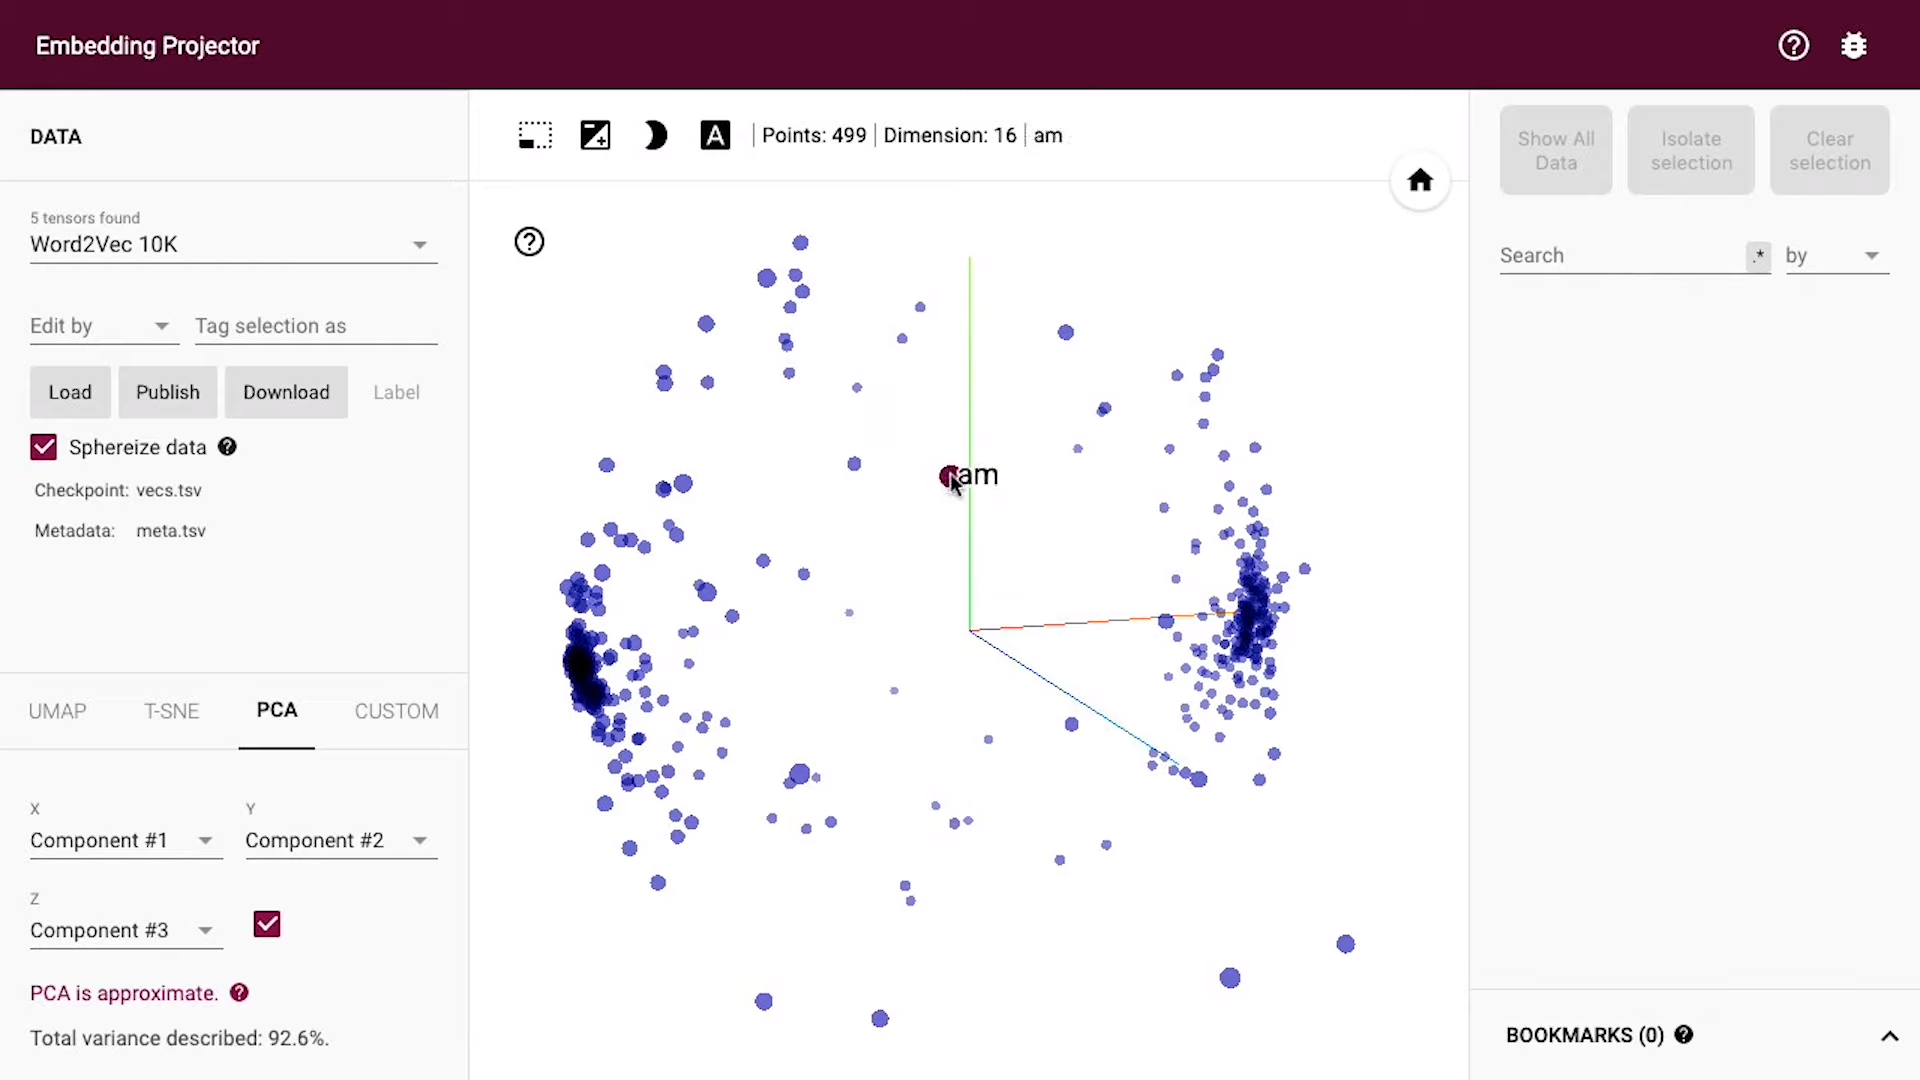

In [28]:
Image(filename='embeddings.png')

We use tf.keras.layers.Embedding to represent the word embedding. It takes few of the parameters as follows:
1. Vocabulary Size
2. The Embedding size: Represents the dimension of embedding to be used. (A Hyperparameter)
3. Input lenght: The maximum length of the input sequence, it gets affected by padding and truncation.
    
Output the need to be passed to a flatten or GlobalAveragePooling layer,then can be passed to dense layers. The 
final layer will need to have one node, which will be the sentiment.

# Lets study to implement Word Embeddings

In [29]:
data = pd.read_csv("combined_data.csv")
data.head()

Unnamed: 0                                               text  sentiment
0           0  So there is no way for me to plug it in here i...          0
1           1                         Good case Excellent value.          1
2           2                             Great for the jawbone.          1
3           3  Tied to charger for conversations lasting more...          0
4           4                                  The mic is great.          1

In [30]:
text = np.array(list(data["text"]))
labels = np.array(list(data["sentiment"]))

In [31]:
# Lets split the dataset into train and test set
train_len = int(len(text) * 0.8)
index = np.arange(len(text))
np.random.shuffle(index)

train = text[:train_len]
train_label = labels[:train_len]

test = text[train_len:]
test_label = labels[train_len:]

In [32]:
train[:5]

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case Excellent value.', 'Great for the jawbone.',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
       'The mic is great.'], dtype='<U743')

In [33]:
train_label[:5]

array([0, 1, 1, 0, 1])

In [34]:
VOCAB = 1000
MAX_LEN = 100
EMBEDDING_DIM = 64
OOB = "<OOV>"
TRUNCATE = "post"
PAD = "post"

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB, oov_token=OOB)
tokenizer.fit_on_texts(train)

word_idx = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train)
test_sequences = tokenizer.texts_to_sequences(test)

######

padded_sequences_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding=PAD, truncating=TRUNCATE,
                                                                maxlen=MAX_LEN)

padded_sequences_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding=PAD, truncating=TRUNCATE,
                                                                maxlen=MAX_LEN)


In [35]:
padded_sequences_train.shape

(1593, 100)

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [37]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [38]:
model.fit(padded_sequences_train, train_label, validation_data=(padded_sequences_test, test_label), 
         epochs=10)

Epoch 1/10
50/50 [==============================] - 2s 11ms/step - loss: 0.6954 - accuracy: 0.4947 - val_loss: 0.6936 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5229 - val_loss: 0.6945 - val_accuracy: 0.4110
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5229 - val_loss: 0.6952 - val_accuracy: 0.4110
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5229 - val_loss: 0.6958 - val_accuracy: 0.4110
Epoch 5/10
50/50 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5229 - val_loss: 0.6967 - val_accuracy: 0.4110
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5229 - val_loss: 0.6973 - val_accuracy: 0.4110
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5229 - val_loss: 0.6978 - val_accuracy: 0.4110
Epoch 8/10
50/50 [=

In [39]:
# First get the weights of the embedding layer
weights = model.layers[0].weights[0]

In [40]:
word_index = dict([(num, word) for (word,num) in word_idx.items()])
word_index

{1: '<OOV>',
 2: 'the',
 3: 'and',
 4: 'i',
 5: 'it',
 6: 'a',
 7: 'is',
 8: 'to',
 9: 'this',
 10: 'was',
 11: 'of',
 12: 'my',
 13: 'for',
 14: 'not',
 15: 'phone',
 16: 'in',
 17: 'very',
 18: 'with',
 19: 'great',
 20: 'good',
 21: 'on',
 22: 'that',
 23: 'have',
 24: 'you',
 25: 'had',
 26: 'so',
 27: 'but',
 28: 'are',
 29: 'food',
 30: 'service',
 31: 'be',
 32: 'as',
 33: 'place',
 34: 'all',
 35: 'like',
 36: 'quality',
 37: 'time',
 38: 'product',
 39: 'one',
 40: 'at',
 41: 'we',
 42: 'well',
 43: 'they',
 44: 'would',
 45: 'back',
 46: 'if',
 47: 'headset',
 48: 'works',
 49: 'battery',
 50: 'really',
 51: "don't",
 52: 'sound',
 53: 'your',
 54: 'use',
 55: 'best',
 56: 'up',
 57: 'from',
 58: 'has',
 59: 'just',
 60: 'an',
 61: "i've",
 62: 'will',
 63: 'no',
 64: 'were',
 65: 'only',
 66: 'also',
 67: 'me',
 68: 'there',
 69: 'ever',
 70: 'than',
 71: "it's",
 72: 'out',
 73: 'nice',
 74: 'ear',
 75: 'go',
 76: 'excellent',
 77: 'when',
 78: 'first',
 79: 'work',
 80: 'r

In [41]:
import io

#Writing out the embedding vector and metadata
out_v = io.open("vecs.tsv", "w", encoding="utf-8")
out_m = io.open("meta.tsv", "w", encoding="utf-8")

for word_num in range(1, VOCAB):
    word = word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

# Because the tensorflow projector takes the vectors of the form 0.1\t0.2\t0.3\t...

In [42]:
# Lets tweak the model a bit
VOCAB = 500
MAX_LEN = 50
EMBEDDING_DIM = 64
OOB = "<OOV>"
TRUNCATE = "post"
PAD = "post"

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB, oov_token=OOB)
tokenizer.fit_on_texts(train)

word_idx = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train)
test_sequences = tokenizer.texts_to_sequences(test)

######

padded_sequences_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding=PAD, truncating=TRUNCATE,
                                                                maxlen=MAX_LEN)

padded_sequences_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding=PAD, truncating=TRUNCATE,
                                                                maxlen=MAX_LEN)


In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [44]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [45]:
model.fit(padded_sequences_train, train_label, validation_data=(padded_sequences_test, test_label), 
         epochs=50,verbose=2)

Epoch 1/50
50/50 - 1s - loss: 0.7756 - accuracy: 0.5261 - val_loss: 0.7582 - val_accuracy: 0.4110 - 1s/epoch - 29ms/step
Epoch 2/50
50/50 - 0s - loss: 0.7403 - accuracy: 0.5267 - val_loss: 0.7309 - val_accuracy: 0.4110 - 173ms/epoch - 3ms/step
Epoch 3/50
50/50 - 0s - loss: 0.7192 - accuracy: 0.5254 - val_loss: 0.7156 - val_accuracy: 0.4110 - 192ms/epoch - 4ms/step
Epoch 4/50
50/50 - 0s - loss: 0.7063 - accuracy: 0.5279 - val_loss: 0.7071 - val_accuracy: 0.4110 - 169ms/epoch - 3ms/step
Epoch 5/50
50/50 - 0s - loss: 0.6996 - accuracy: 0.5304 - val_loss: 0.7026 - val_accuracy: 0.4110 - 165ms/epoch - 3ms/step
Epoch 6/50
50/50 - 0s - loss: 0.6949 - accuracy: 0.5336 - val_loss: 0.7000 - val_accuracy: 0.4110 - 176ms/epoch - 4ms/step
Epoch 7/50
50/50 - 0s - loss: 0.6928 - accuracy: 0.5374 - val_loss: 0.6987 - val_accuracy: 0.4110 - 169ms/epoch - 3ms/step
Epoch 8/50
50/50 - 0s - loss: 0.6917 - accuracy: 0.5650 - val_loss: 0.6975 - val_accuracy: 0.4135 - 173ms/epoch - 3ms/step
Epoch 9/50
50/50 -

So far we have been tokenizing using full words. How about using sub-words to tokenize. Subwords are distinct words that can be broken out, and might be more common then the whole word itself. Like the word: nevertheless, wont appear in a review much as the words: never, the, less. We may have more common words if broken out like this.

This helps avoid marking very rare words as OOV when you use only the most common words in a corpus.

In [46]:
text

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case Excellent value.', 'Great for the jawbone.', ...,
       'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming and I think we'll just go to Ninja Sushi next time.",
       "Then as if I hadn't wasted enough of my life there they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype='<U743')

In [47]:
import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(text, VOCAB, max_subword_length=5)

C:\Users\Gopu_DSAI\anaconda3\envs\tf2_deepai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
print(text[5])
encoded = tokenizer.encode(text[5])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[5, 102, 10, 350, 349, 347, 347, 211, 2, 122, 361, 347, 276, 10, 220, 276, 15, 10, 50, 19, 276, 181, 276, 42, 200, 10, 220, 276, 13, 29, 212, 362, 210, 361, 51, 290]


In [49]:
for i in encoded:
  print(tokenizer.decode([i]))

# We can see some words are broken into "j","i" ...

I 
have 
to 
j
i
g
g
le 
the 
pl
u
g
 
to 
get
 
it 
to 
li
ne
 
up
 
ri
ght 
to 
get
 
de
ce
nt 
v
ol
u
me
.


In [50]:
text = list(text)
for i, sentence in enumerate(text):
  text[i] = tokenizer.encode(sentence)

In [51]:
import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

# Pad all sentences
sentences_padded = tf.keras.preprocessing.sequence.pad_sequences(text, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

# Separate out the sentences and labels into training and test sets
training_size = int(len(text) * 0.8)

training_sentences = sentences_padded[0:training_size]
testing_sentences = sentences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [52]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB, EMBEDDING_DIM, input_length=MAX_LEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 64)            32000     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 32,397
Trainable params: 32,397
Non-trainable params: 0
_________________________________________________________________


In [53]:
num_epochs = 30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sentences, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_sentences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 2s 10ms/step - loss: 0.6925 - accuracy: 0.5361 - val_loss: 0.6901 - val_accuracy: 0.6341
Epoch 2/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.6510 - val_loss: 0.6791 - val_accuracy: 0.6416
Epoch 3/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6760 - accuracy: 0.6598 - val_loss: 0.6607 - val_accuracy: 0.7018
Epoch 4/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6438 - accuracy: 0.7207 - val_loss: 0.6448 - val_accuracy: 0.6491
Epoch 5/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6017 - accuracy: 0.7577 - val_loss: 0.5904 - val_accuracy: 0.7318
Epoch 6/30
50/50 [==============================] - 0s 5ms/step - loss: 0.5579 - accuracy: 0.7734 - val_loss: 0.5860 - val_accuracy: 0.6867
Epoch 7/30
50/50 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7853 - val_loss: 0.5774 - val_accuracy: 0.6917
Epoch 8/30
50/50 [=

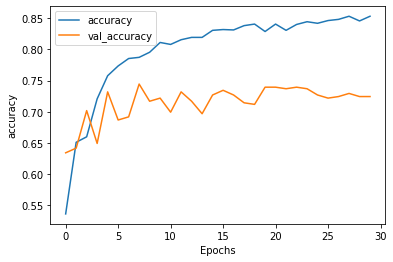

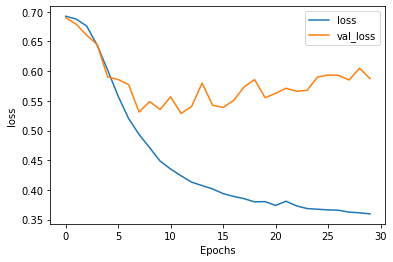

In [54]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [57]:
# Define a function to take a series of reviews
# and predict whether each one is a positive or negative review

# max_length = 100 # previously defined

def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
  # Keep the original sentences so that we can keep using them later
  # Create an array to hold the encoded sequences
  new_sequences = []

  # Convert the new reviews to sequences
  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type='post' 
  padding_type='post'

  # Pad all sequences for the new reviews
  new_reviews_padded = tf.keras.preprocessing.sequence.pad_sequences(new_sequences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)             

  classes = model.predict(new_reviews_padded)

  # The closer the class is to 1, the more positive the review is
  for x in range(len(new_sentences)):
    
    # We can see the padded sequence if desired
    # Print the sequence
    if (show_padded_sequence):
      print(new_reviews_padded[x])
    # Print the review as text
    print(new_sentences[x])
    # Print its predicted class
    print(classes[x])
    print("\n")

In [58]:
# Use the model to predict some reviews   
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)


[ 5 31 69 28 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
I love this phone
[0.50305766]


[313 165 365 226 276  12  80 208   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.5382214]


[313 165 365 226 276  12  89   6 114 203 360  14 156   5  32 178 143   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.15020287]


[313 165 365 226 276  12 347  33 149   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.04994538]


[  2  89 163  23  62  20  78 276 349 353  51  68  62  92 365   0   0   0
   0

# LSTM and BiDirectional LSTM Implementation for text processing:

In [62]:
def fit_model_now (model, sentences) :
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  history = model.fit(training_sentences, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_sentences, testing_labels_final))
  return history

def plot_results (history):
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

def fit_model_and_show_results (model, sentences):
  history = fit_model_now(model, sentences)
  plot_results(history)
  predict_review(model, sentences)

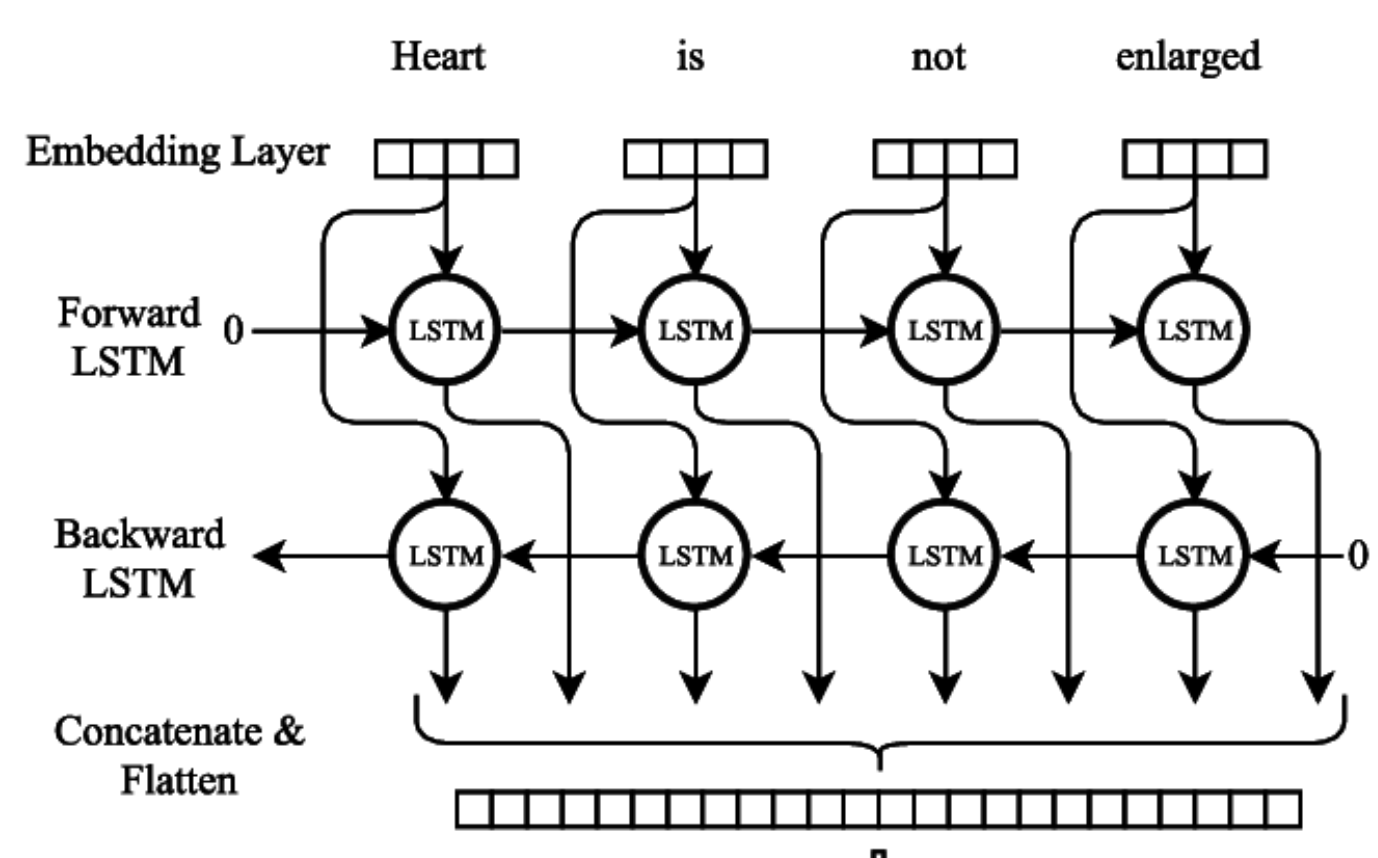

In [65]:
Image(filename="bilstm.png")

In [63]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB, EMBEDDING_DIM, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(EMBEDDING_DIM)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 64)            32000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 98,829
Trainable params: 98,829
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 8s 68ms/step - loss: 0.6915 - accuracy: 0.5060 - val_loss: 0.727

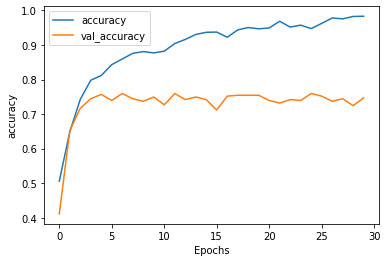

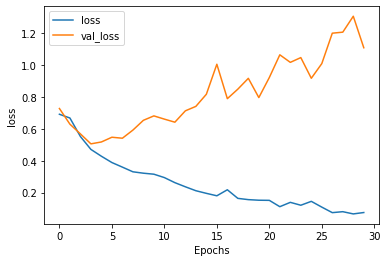

[ 5 31 69 28 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
I love this phone
[0.9912932]


[313 165 365 226 276  12  80 208   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.99629325]


[313 165 365 226 276  12  89   6 114 203 360  14 156   5  32 178 143   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.9294009]


[313 165 365 226 276  12 347  33 149   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.64247644]


[  2  89 163  23  62  20  78 276 349 353  51  68  62  92 365   0   0   0
   0 

In [64]:
fit_model_and_show_results(model_lstm,fake_reviews)

Note, the first Bidirectional LSTM has to output a sequence!!

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 64)            32000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 32)           10368     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 48,845
Trainable params: 48,845
Non-trai

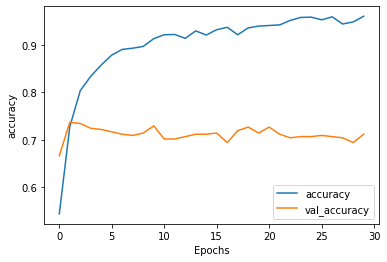

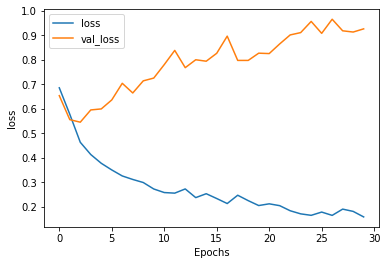

[ 5 31 69 28 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
I love this phone
[0.9715152]


[313 165 365 226 276  12  80 208   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.967055]


[313 165 365 226 276  12  89   6 114 203 360  14 156   5  32 178 143   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.3964122]


[313 165 365 226 276  12 347  33 149   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.10178959]


[  2  89 163  23  62  20  78 276 349 353  51  68  62  92 365   0   0   0
   0   

In [67]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB, EMBEDDING_DIM, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)), 
    # This above has to return a sequence so that this next LSTM can take a sequence as the input
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)

Using 1D convolutions like we did for timeseries.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 64)            32000     
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           41088     
                                                                 
 global_average_pooling1d_3   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 6)                 774       
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73,869
Trainable params: 73,869
Non-trainable params: 0
__________________________________________________

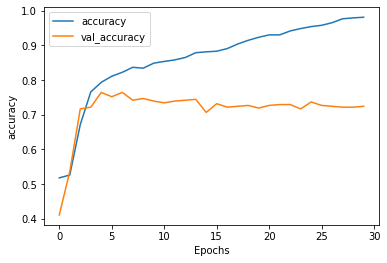

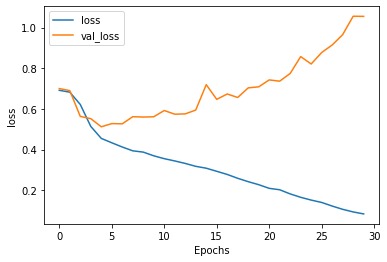

[ 5 31 69 28 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
I love this phone
[0.962796]


[313 165 365 226 276  12  80 208   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.7016743]


[313 165 365 226 276  12  89   6 114 203 360  14 156   5  32 178 143   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.02807367]


[313 165 365 226 276  12 347  33 149   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.01704618]


[  2  89 163  23  62  20  78 276 349 353  51  68  62  92 365   0   0   0
   0  

In [70]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB, EMBEDDING_DIM, input_length=max_length),
    tf.keras.layers.Conv1D(128, kernel_size=5, activation="relu"),
    tf.keras.layers.GlobalAveragePooling1D(),  # Or flatten layer ist auch gut
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_cnn, fake_reviews)

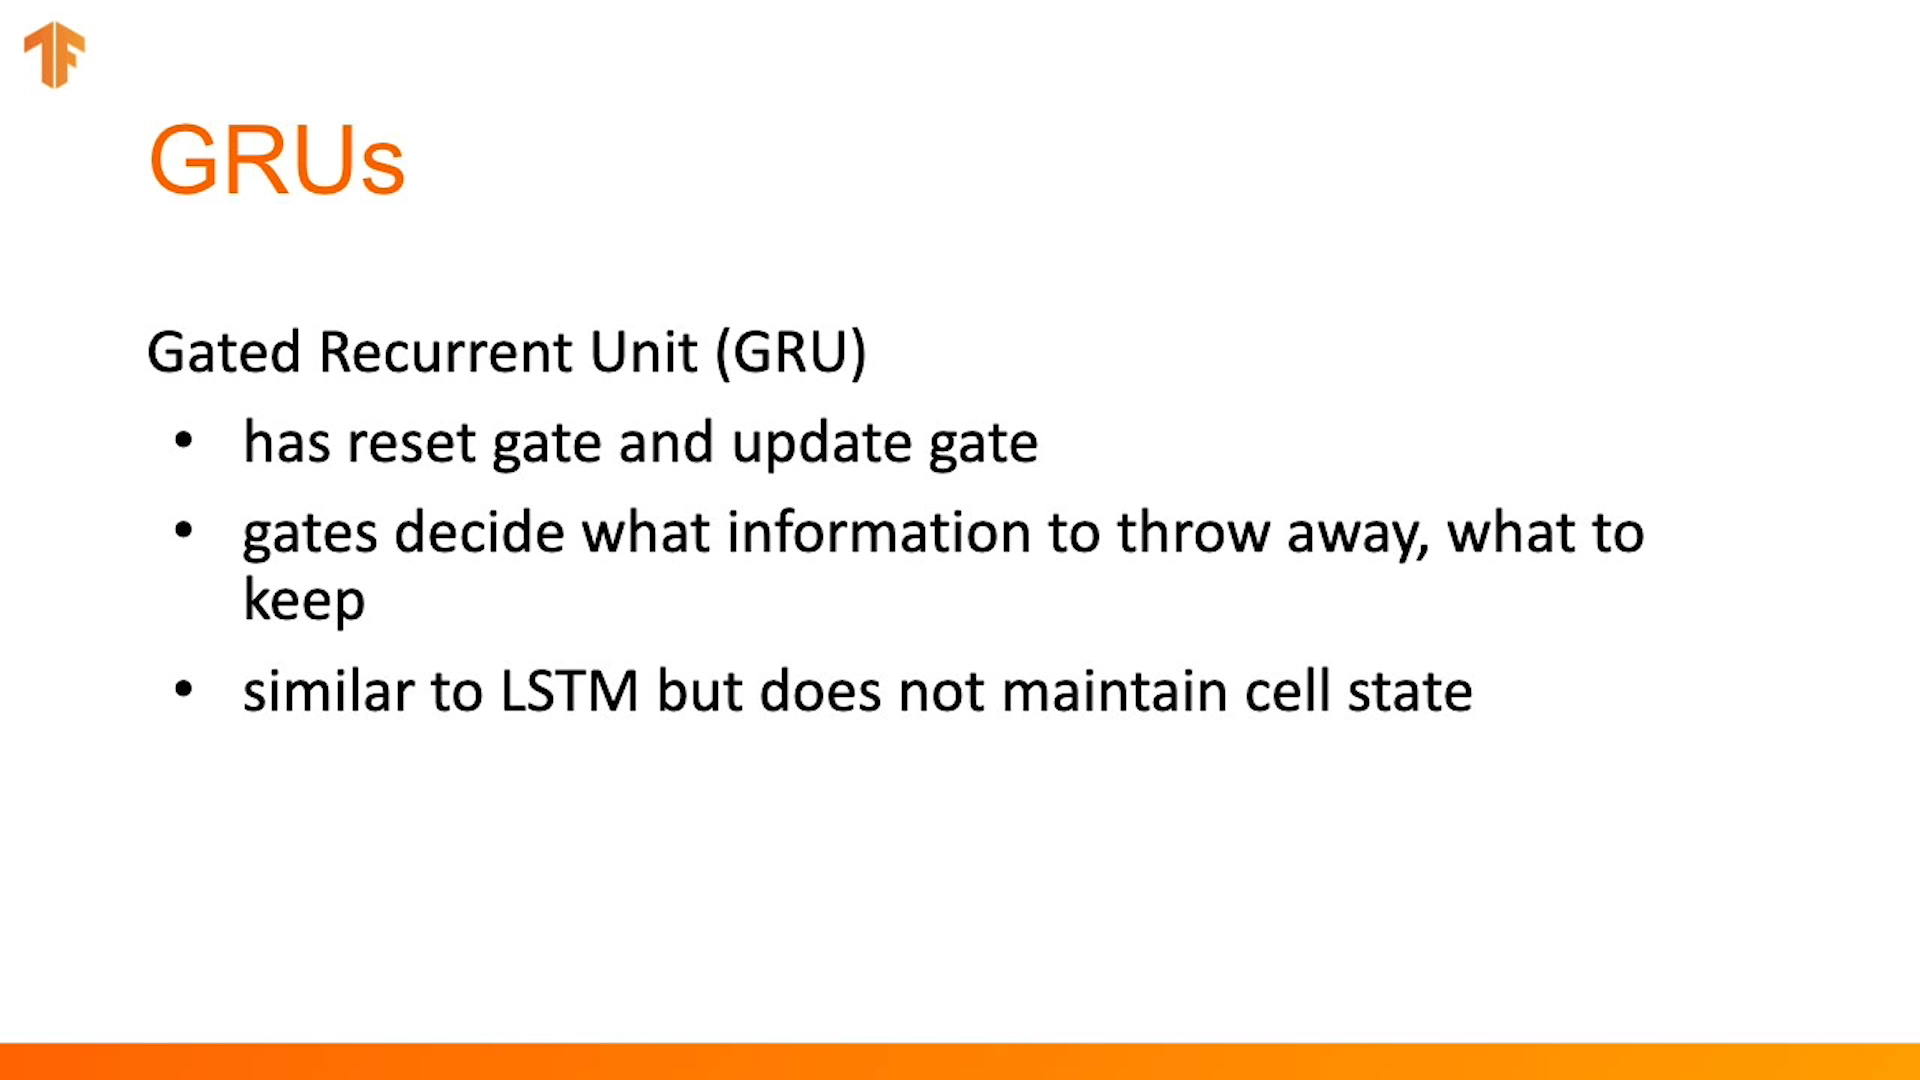

In [69]:
Image(filename="GRU.png")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 64)            32000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 6)                 390       
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 51,213
Trainable params: 51,213
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 9s 65ms/step - loss: 0.6891 - accuracy: 0.5443 - val_loss: 0.689

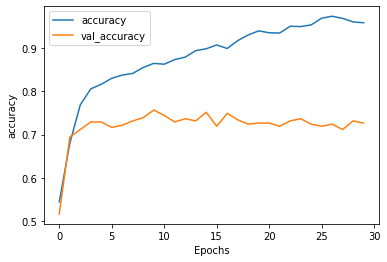

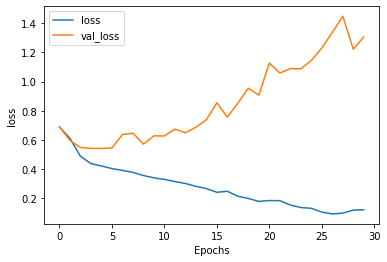

[ 5 31 69 28 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
I love this phone
[0.99539936]


[313 165 365 226 276  12  80 208   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.9995209]


[313 165 365 226 276  12  89   6 114 203 360  14 156   5  32 178 143   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.50720245]


[313 165 365 226 276  12 347  33 149   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.8058772]


[  2  89 163  23  62  20  78 276 349 353  51  68  62  92 365   0   0   0
   0 

In [71]:
model_GRU = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB, EMBEDDING_DIM, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

fit_model_and_show_results(model_GRU, fake_reviews)

# Text Generation:

 Predict the next word in a sequence.

Text generation can be done through simply predicting the next most likely word, given an input sequence. This can be done over and over by feeding the original input sequence, plus the newly predicted end word, as the next input sequence to the model. As such, the full output generated from a very short original input can effectively go on however long you want it to be.

We must make the output 1 hot level encoded label over the corpus os possible text outputs we want, and then we want to make 
sure to use categorical cross entropy instead of binar cross entropy loss, as now we have multiple classes instead of just two
classes.

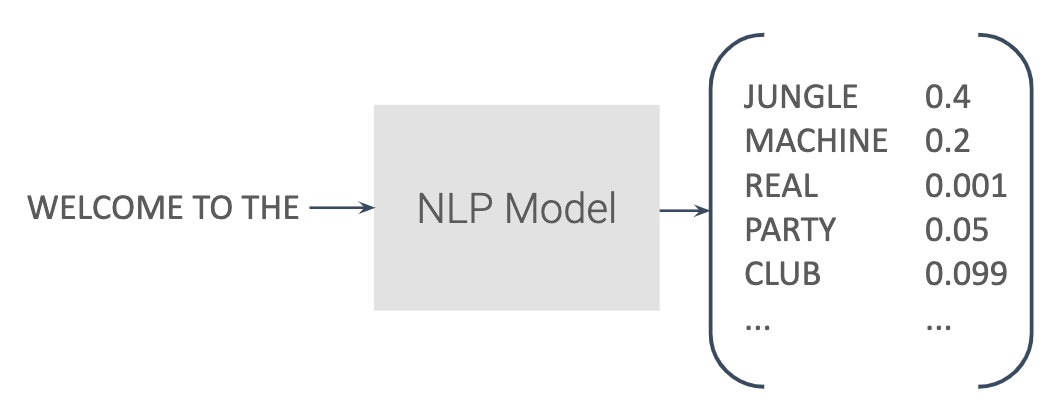

In [2]:
Image(filename="textgenerate.png")

In [2]:
data = pd.read_csv("songdata.csv")[:10] # Because its so huge we cant train on whole or process whole it will run out of memory.

In [3]:
data.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  Look at her face, it's a wonderful face  \nAnd...  
1  Take it easy with me, please  \nTouch me gentl...  
2  I'll never know why I had to go  \nWhy I had t...  
3  Making somebody happy is a question of give an...  
4  Making somebody happy is a question of give an...

In [4]:
list(data["text"].values)[0]

"Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?  \n  \nAnd when we go for a walk in the park  \nAnd she holds me and squeezes my hand  \nWe'll go on walking for hours and talking  \nAbout all the things that we plan  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?\n\n"

In [5]:
def preprocessed_string(dataframe, field):
    
    # Lets remove all the punctuations
    dataframe[field] = dataframe[field].str.replace("[{}]".format(string.punctuation), " ")
    # Here .str is important it will convert the column to a pandas core object then any operation applied to it will be applied
    # to individual element seperately. Similar to map() function
    
    # lower case
    dataframe[field] = dataframe[field].str.lower()
    
    # Joining everything in one line
    lyrics = dataframe[field].str.cat()
    
    # Split it at \n
    lyrics = lyrics.split("\n")
    
    # Removing empty lines and stripping whitespace from front and end
    lyrics = [l for l in lyrics if l != '']
    lyrics = [l.strip() for l in lyrics]
    
    return lyrics

In [6]:
processed_lyrics = preprocessed_string(data, "text")

C:\Users\Gopu_DSAI\AppData\Local\Temp\ipykernel_10992\2450495928.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[field] = dataframe[field].str.replace("[{}]".format(string.punctuation), " ")


In [7]:
processed_lyrics[:5]

['look at her face  it s a wonderful face',
 'and it means something special to me',
 'look at the way that she smiles when she sees me',
 'how lucky can one fellow be',
 '']

In [8]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Only top num_words-1 most frequent words will be taken into account. As we didnt set num_words, default is None
# Only words known by the tokenizer will be taken into account.

tokenizer.fit_on_texts(processed_lyrics)

total_words = len(tokenizer.word_index) + 1
print(total_words)
print(tokenizer.word_index)

485
{'you': 1, 'i': 2, 'a': 3, 'and': 4, 'me': 5, 'the': 6, 'it': 7, 'is': 8, 'my': 9, 'to': 10, 'be': 11, 'ma': 12, 'of': 13, 'm': 14, 'your': 15, 's': 16, 'love': 17, 'so': 18, 'as': 19, 'boomerang': 20, 'that': 21, 'in': 22, 'andante': 23, 'boom': 24, 'make': 25, 'dumb': 26, 'on': 27, 'oh': 28, 'dum': 29, 'for': 30, 'but': 31, 're': 32, 't': 33, 'new': 34, 'bang': 35, 'll': 36, 'she': 37, 'like': 38, 'know': 39, 'now': 40, 'how': 41, 'could': 42, 'sing': 43, 'never': 44, 'no': 45, 'we': 46, 'hum': 47, 'chiquitita': 48, 'can': 49, 'song': 50, 'had': 51, 'good': 52, 'just': 53, 'girl': 54, 'again': 55, 'will': 56, 'take': 57, 'please': 58, 'let': 59, 'am': 60, 'eyes': 61, 'was': 62, 'always': 63, 'cassandra': 64, 'blue': 65, 'what': 66, 'time': 67, 'don': 68, 'there': 69, 'were': 70, 'return': 71, 'once': 72, 'then': 73, 'sorry': 74, 'cryin': 75, 'over': 76, 'feel': 77, 'ever': 78, 'believe': 79, 'do': 80, 'go': 81, 'all': 82, 'out': 83, 'think': 84, 'every': 85, 'they': 86, 'leave': 

In [9]:
line = processed_lyrics[0]
tokenizer.texts_to_sequences([line]) # vs tokenizer.texts_to_sequences(line)  ---> [[128],[71],[70],...]

[[88, 89, 148, 196, 7, 16, 3, 281, 196]]

In [10]:
sequences = []
tokens = tokenizer.texts_to_sequences([line])[0]
for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1]
    sequences.append(n_gram_sequence)
sequences

[[88, 89],
 [88, 89, 148],
 [88, 89, 148, 196],
 [88, 89, 148, 196, 7],
 [88, 89, 148, 196, 7, 16],
 [88, 89, 148, 196, 7, 16, 3],
 [88, 89, 148, 196, 7, 16, 3, 281],
 [88, 89, 148, 196, 7, 16, 3, 281, 196]]

Since in Text Generation we need to predict the next word based on the previously seen words we need to create sequence based
on N-gram models like above

In [11]:
sequences = []
for line in processed_lyrics:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

In [12]:
len(sequences)

2189

In [13]:
sequences[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  88,  89],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  88,  89, 148]])

In [14]:
# Split sequences between the "input" sequence(all till last as the last word of the sequence will be the label) 
# "output" predicted next word i.e. last word of all the sequence
input_sequences, labels = sequences[:,:-1], sequences[:,-1]

In [15]:
# Lets one hot encode the labels
labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [16]:
labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(input_sequences[5])
print(input_sequences[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(labels[5])
print(labels[6])

39
103
[  0   0   0   0   0   0   0   0   0   0   0   0   0  88  89 148 196   7
  16]
[  0   0   0   0   0   0   0   0   0   0   0   0  88  89 148 196   7  16
   3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_words, activation="softmax")
])

In [20]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [21]:
history = model.fit(input_sequences, labels, epochs=200, verbose=1)

Epoch 1/200
69/69 [==============================] - 9s 17ms/step - loss: 5.9102 - accuracy: 0.0388
Epoch 2/200
69/69 [==============================] - 1s 15ms/step - loss: 5.3457 - accuracy: 0.0452
Epoch 3/200
69/69 [==============================] - 1s 15ms/step - loss: 5.2748 - accuracy: 0.0512
Epoch 4/200
69/69 [==============================] - 1s 15ms/step - loss: 5.2105 - accuracy: 0.0466
Epoch 5/200
69/69 [==============================] - 1s 15ms/step - loss: 5.1317 - accuracy: 0.0507
Epoch 6/200
69/69 [==============================] - 1s 16ms/step - loss: 5.0533 - accuracy: 0.0525
Epoch 7/200
69/69 [==============================] - 1s 16ms/step - loss: 4.9755 - accuracy: 0.0580
Epoch 8/200
69/69 [==============================] - 1s 17ms/step - loss: 4.8905 - accuracy: 0.0644
Epoch 9/200
69/69 [==============================] - 2s 24ms/step - loss: 4.7971 - accuracy: 0.0777
Epoch 10/200
69/69 [==============================] - 2s 25ms/step - loss: 4.6934 - accuracy: 0.0909

69/69 [==============================] - 1s 15ms/step - loss: 0.5124 - accuracy: 0.8716
Epoch 163/200
69/69 [==============================] - 1s 15ms/step - loss: 0.5086 - accuracy: 0.8744
Epoch 164/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4997 - accuracy: 0.8730
Epoch 165/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4920 - accuracy: 0.8799
Epoch 166/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4889 - accuracy: 0.8785
Epoch 167/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4906 - accuracy: 0.8757
Epoch 168/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4842 - accuracy: 0.8789
Epoch 169/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4779 - accuracy: 0.8785
Epoch 170/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4689 - accuracy: 0.8812
Epoch 171/200
69/69 [==============================] - 1s 15ms/step - loss: 0.4638 - accuracy: 0

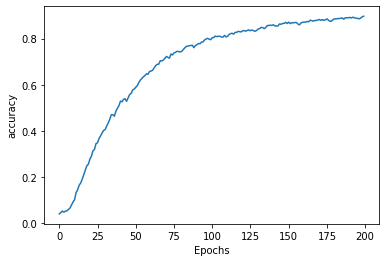

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [23]:
seed_text = "I am in Love with"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
    # We are also adding the output word to the input sentence to be used for prediction in the next step!
print(seed_text)

I am in Love with your music and make me what could wrong love love care to to another break deep care all gone burying the quiet shouting i hand just would sky found am re hand song park park sky found cry go on don go go re kind told over told told cause over like you re not talk heartaches de they go burying baby baby at night hour kisses hand re sky found m re sweet past hour hour bridges sky am know do what boomerang de de hum hum hum hum rely on special burying re breeze breeze pride all said


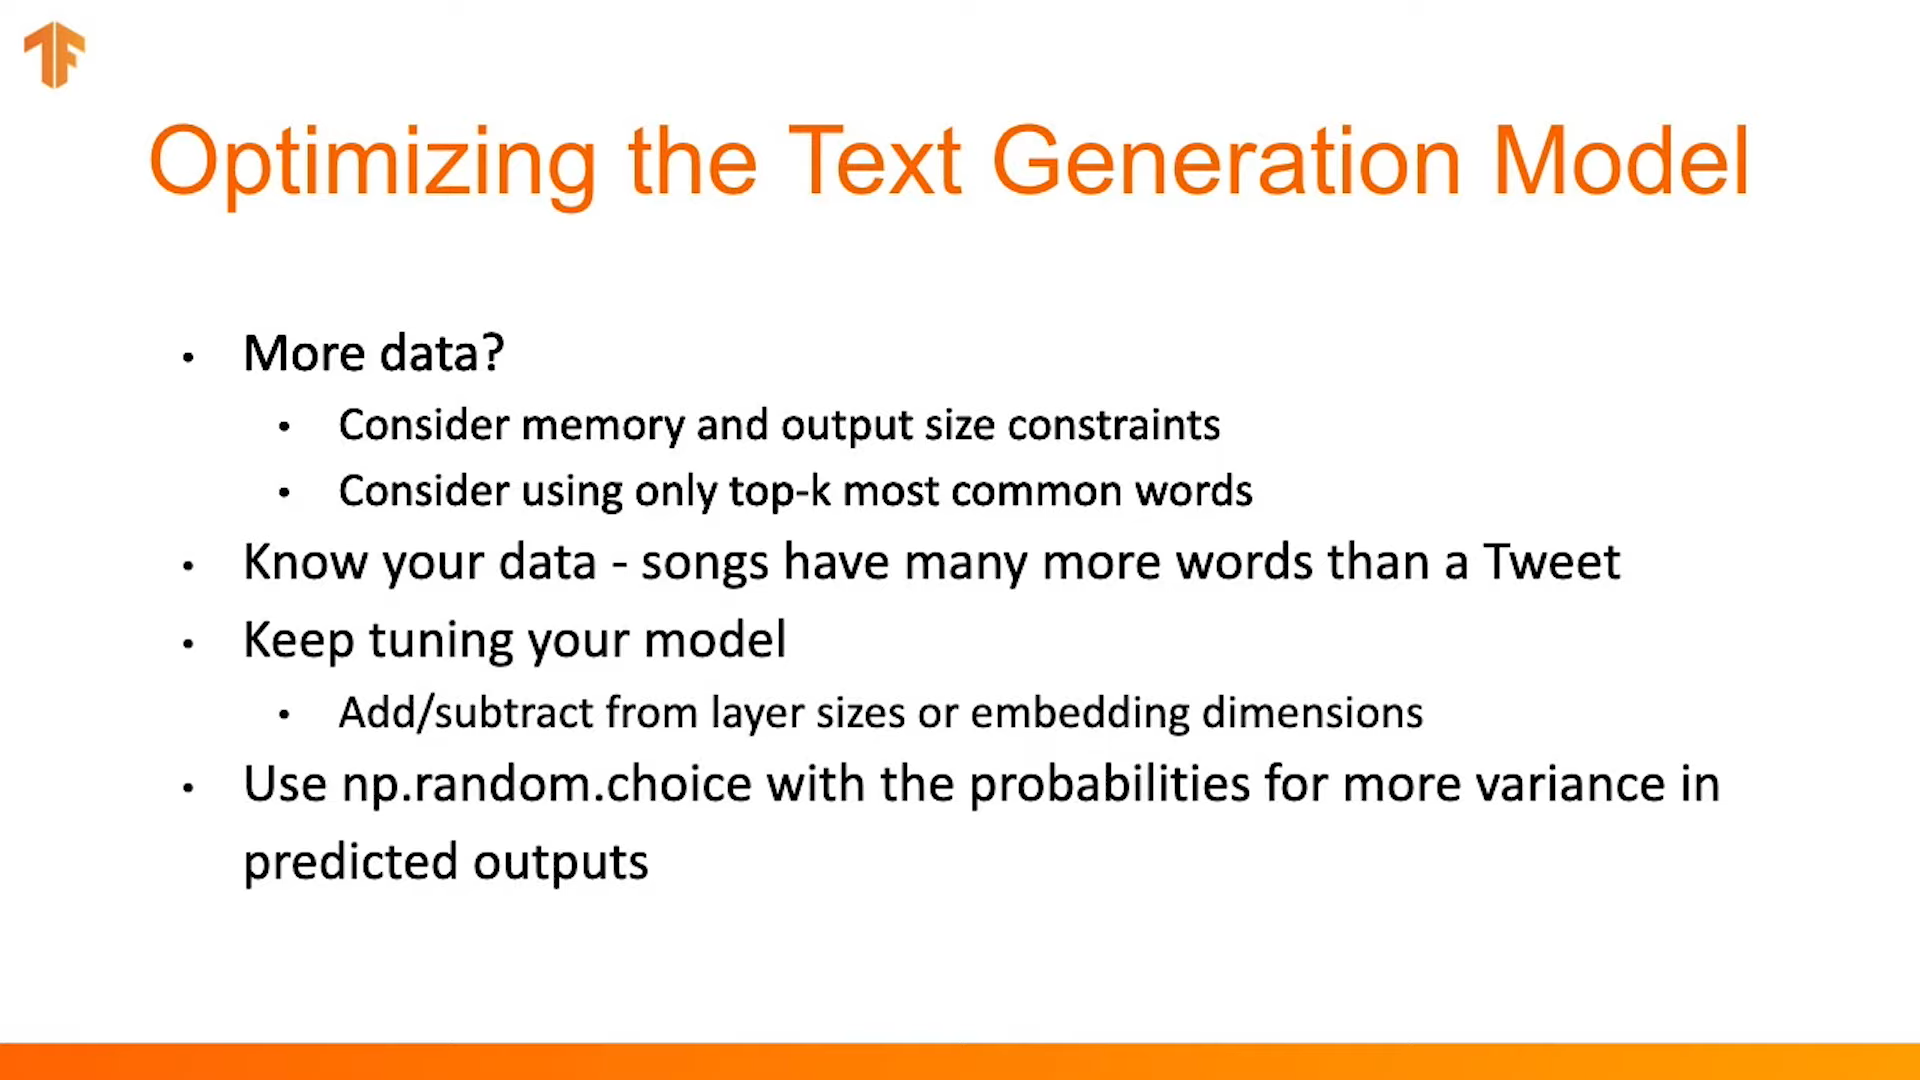

In [24]:
Image(filename='optimizing.png')

In [ ]:
# Try to train on 250 lyrics songs and bot of tuning the hyperparams.